In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
data.shape

(30, 2)

In [3]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
data.isnull().sum().sum()

0

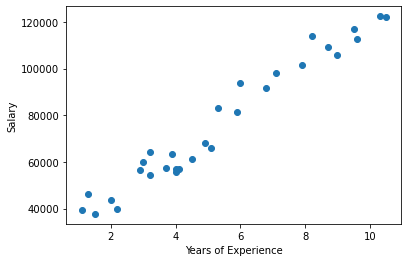

In [24]:
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [6]:
X=data.iloc[:,:-1] #features
Y=data.iloc[:,-1] #target
X=np.asarray(X)
Y=np.asarray(Y)

In [27]:
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [31]:
X_test.shape

(6, 1)

In [9]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression() #model created
reg.fit(X_train,Y_train) #training the model

LinearRegression()

In [10]:
y_pred=reg.predict(X_test) #testing the model
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [11]:
pd.DataFrame({'Actual':Y_test,'Predicted':y_pred,'Error':Y_test-y_pred})

,Actual,Predicted,Error
0,112635.0,115790.210113,-3155.210113
1,67938.0,71498.278095,-3560.278095
2,113812.0,102596.868661,11215.131339
3,83088.0,75267.804224,7820.195776
4,64445.0,55477.792045,8967.207955
5,57189.0,60189.699707,-3000.699707


In [12]:
reg.score(X_test,Y_test)

0.9024461774180497

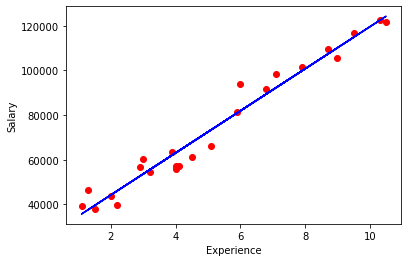

In [13]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,reg.predict(X_train),color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

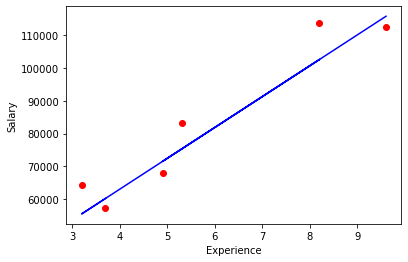

In [14]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,reg.predict(X_test),color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [15]:
a=data.iloc[:,0]
b=data.iloc[:,1]

In [16]:
#gradient descent
m=0
c=0
L=0.01
epochs=2000
n=float(len(a))
for i in range(epochs):
    Y_pred=m*a+c
    D_m=(-2/n)*sum(a*(b-Y_pred))
    D_c=(-2/n)*sum(b-Y_pred)
    m=m-L*D_m
    c=c-L*D_c
print(m,c)

9450.698250047992 25787.240971208394


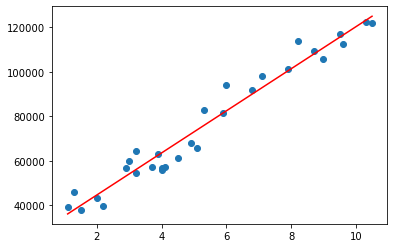

In [17]:
Y_pred=m*X+c
plt.scatter(X,Y)
plt.plot([min(X),max(X)],[min(Y_pred),max(Y_pred)],color='red')
plt.show()

In [18]:
Y_pred=m*X_test+c

In [19]:
pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred.reshape(-1,),'Error':Y_test-Y_pred.reshape(-1,)})

,Actual,Predicted,Error
0,112635.0,116513.944172,-3878.944172
1,67938.0,72095.662396,-4157.662396
2,113812.0,103282.966622,10529.033378
3,83088.0,75875.941696,7212.058304
4,64445.0,56029.475371,8415.524629
5,57189.0,60754.824496,-3565.824496


In [39]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=1000)
r.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=1000)

In [40]:
p=r.predict(X_test)
print(p)

[114854.012       63800.88538333 103546.598       71852.071
  56295.63683333  60924.78199762]


In [41]:
pd.DataFrame({'Actual':Y_test,'Predicted':p,'Error':Y_test-p})

,Actual,Predicted,Error
0,112635.0,114854.012000,-2219.012000
1,67938.0,63800.885383,4137.114617
2,113812.0,103546.598000,10265.402000
3,83088.0,71852.071000,11235.929000
4,64445.0,56295.636833,8149.363167
5,57189.0,60924.781998,-3735.781998
